# Team-5


# Project Name :
   ##  Prediction of the  amount of product purchase using  Mutiple  Linear Regression basing on the given data set .


## Description

The data set here is a sample of the transactions made in a retail store.The store wants to know better the purchasing behavior of the customer against different products.
Our aim is to predict the amount of purchase with the help of the information provided.

## 1.Importing Libraries 

In [4]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sn

%matplotlib inline

## 2.Importing Data Set

In [5]:
df = pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [7]:
dataframe = pd.read_csv('train.csv',usecols = ['Gender','Purchase'])
dataframe                        

,Gender,Purchase
0,F,8370
1,F,15200
2,F,1422
3,F,1057
4,M,7969
5,M,15227
6,M,19215
7,M,15854
8,M,15686
9,M,7871


In [11]:
for i in range(len(dataframe)):
    femalecount = 0
    malecount = 0
    if  dataframe.loc[i][0] == 'F':
        
        femalecount = femalecount+int(dataframe.loc[i][1])
    else:
        malecount = malecount + int(dataframe.loc[i][1])
sizes = [femalecount,malecount]        
plot.pieplot(sizes,labels=['Female','Male'],autopct = '%1.2f%%')

AttributeError: module 'matplotlib.pyplot' has no attribute 'pieplot'

In [52]:
df.shape

(550068, 12)

In [53]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


## Pair Plots

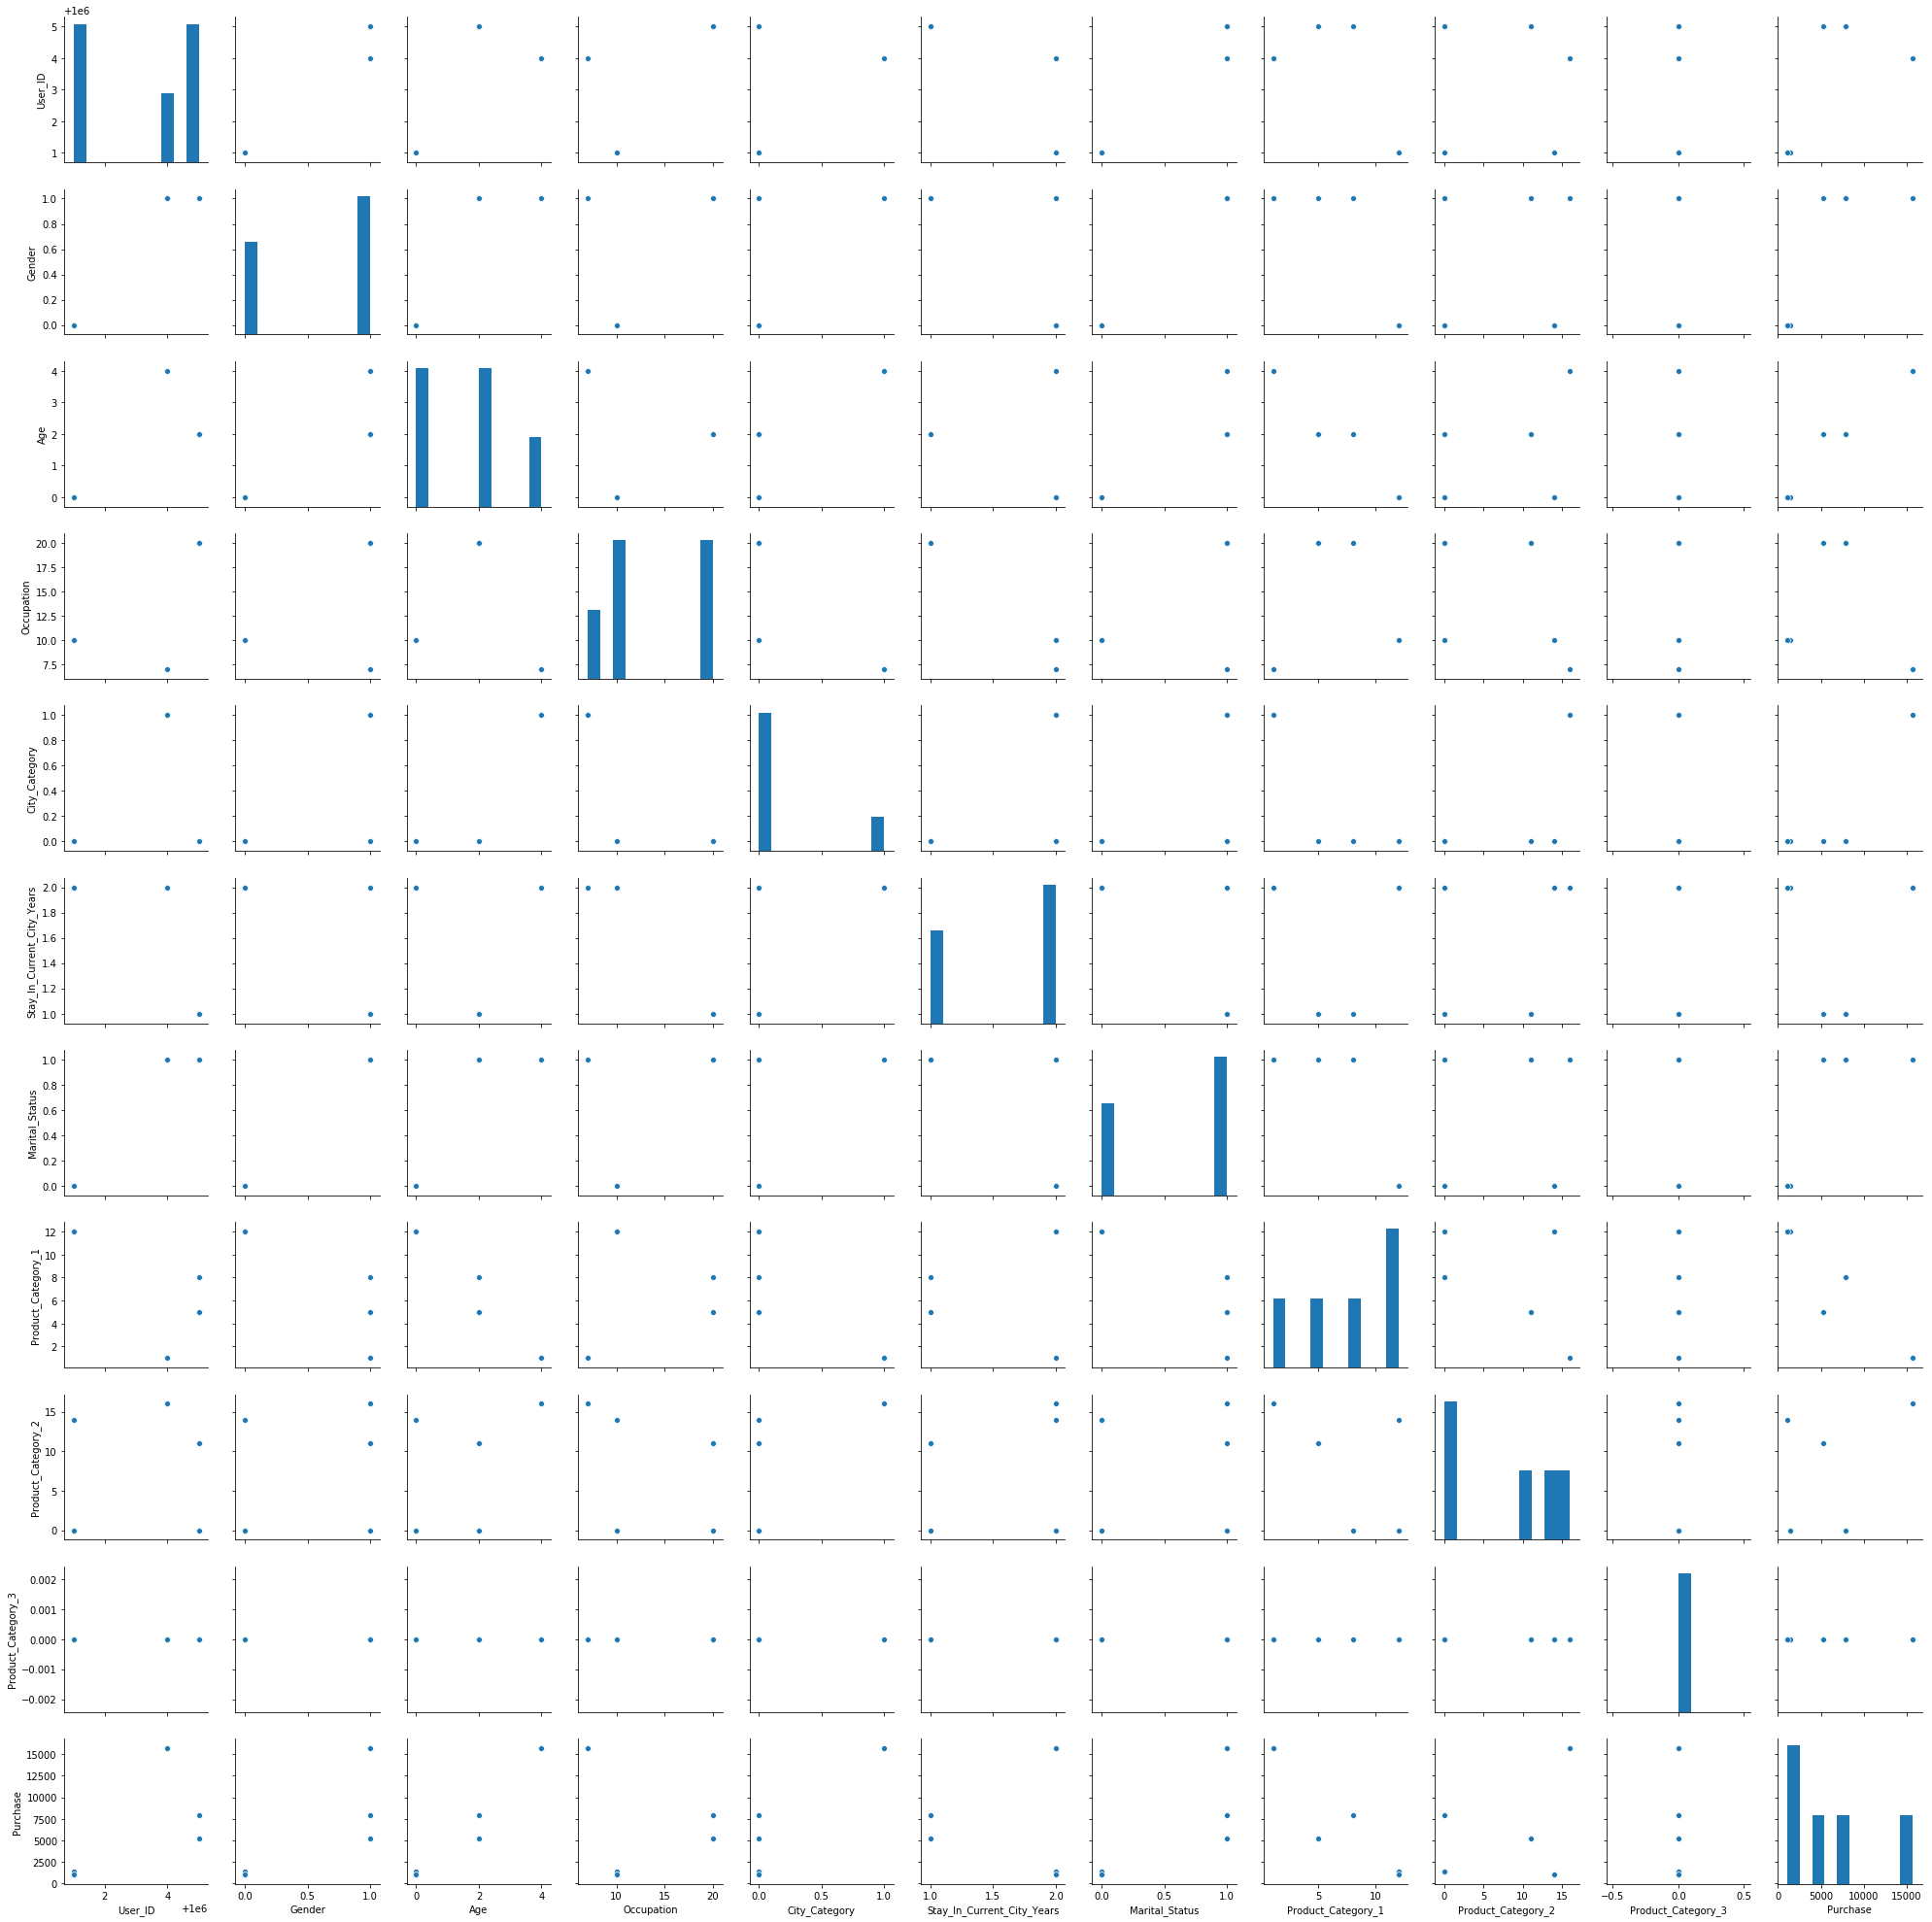

In [81]:
sn.pairplot(df.iloc[[2,3,8,9,10],:])

## 3.Handling  Missing Values

In [54]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [55]:
df = df.fillna(0)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [56]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [57]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Categorisation 

In [ ]:
# Categorical data can be handled by using dummy variables, which are also called as indicator variables.
# dummy variables using label encoder of sklearn

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df.Gender = le.fit_transform(df.Gender)
df.Age = le.fit_transform(df.Age)
df.City_Category = le.fit_transform(df.City_Category)
df.Stay_In_Current_City_Years = le.fit_transform(df.Stay_In_Current_City_Years)
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969
5,1000003,P00193542,1,2,15,0,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,4,7,1,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,4,7,1,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,2,20,0,1,1,8,0.0,0.0,7871


# Model

In [94]:
import statsmodels.formula.api as smf
model1 = smf.ols("np.log(Purchase) ~  Gender + Age + Occupation + City_Category + Marital_Status + Product_Category_1 + Product_Category_2 + Product_Category_3",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Purchase)   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                 1.686e+04
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:23:25   Log-Likelihood:            -5.5478e+05
No. Observations:              550068   AIC:                         1.110e+06
Df Residuals:                  550059   BIC:                         1.110e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.2052      0.003   2760.136      0.000       9.199       9.212
Gender                 0.0404      0.002     19.316      0.000       0.036       0.045
Age                    0.0193      0.001     27.351      0.000       0.018       0.021
Occupation             0.0004      0.000      2.851      0.004       0.000       0.001
City_Category          0.0225      0.001     18.927      0.000       0.020       0.025
Marital_Status        -0.0063      0.002     -3.273      0.001      -0.010      -0.003
Product_Category_1    -0.0764      0.000   -309.363      0.000      -0.077      -0.076
Product_Category_2     0.0017      0.000     11.578      0.000       0.001       0.002
Product_Category_3     0.0087      0.000     55.823      0.000       0.008       0.009
==============================================================================
Omnibus:                   174855.628   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1296350.579
Skew:                          -1.333   Prob(JB):                         0.00
Kurtosis:                      10.032   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Splitting

In [ ]:
x=df.iloc[:,[2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,11]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

In [85]:
y_pred=reg.predict(x_test)

In [86]:
y_pred==y_test

41001     False
16151     False
507262    False
368698    False
353782    False
358687    False
301389    False
278980    False
47994     False
416377    False
266930    False
226794    False
525409    False
490544    False
139180    False
351374    False
194821    False
346419    False
360095    False
249040    False
347094    False
1398      False
148746    False
84873     False
147779    False
103865    False
470708    False
527931    False
435287    False
269847    False
          ...  
263941    False
271136    False
348867    False
219097    False
380213    False
187312    False
352136    False
323647    False
527436    False
333542    False
347436    False
166886    False
54012     False
521367    False
179177    False
361450    False
487327    False
451747    False
112244    False
175476    False
306466    False
532628    False
145199    False
232542    False
317652    False
168473    False
246358    False
105766    False
40384     False
181039    False
Name: Purchase, Length: 

In [87]:
y_pred

array([10493.26950021,  6334.41003236, 11088.07256641, ...,
       12629.77184645, 11481.58299062, 10144.47664932])

In [88]:
print(np.mean(y_pred))
print(np.mean(y_test))

9261.920735466285
9269.135110076899
